In [10]:

pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [54]:
from alpha_vantage.timeseries import TimeSeries
import quandl
import matplotlib.pyplot as plt
import config
import pandas as pd
import os


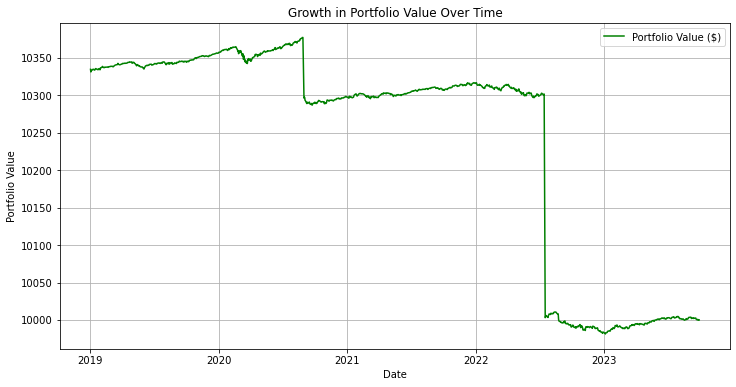

In [71]:

# Initialize the TimeSeries object with your API key
ts = TimeSeries(key=config.api_key, output_format='pandas')

subfolder='data/'

# Define the symbols and their corresponding dollar investments in your portfolio
portfolio = {
    'AAPL': 4000, 
    'MSFT': 3000,  
    'GOOGL': 2000,
    'TSLA': 1000   
}

investment_date = '2019-01-01'

initial_investment = sum(portfolio.values())

# Create an empty DataFrame to store the daily returns
portfolio_returns = pd.DataFrame()

# Initialize a cumulative portfolio return variable
cumulative_portfolio_return = 0

# Fetch daily historical stock data and calculate returns for each symbol
for symbol, investment in portfolio.items():    
    data_path = os.path.join(subfolder, 'portfolio_data_' + symbol + '.parquet')
    
    
# To prevent repeated API calls
    if os.path.exists(data_path):
        data = pd.read_parquet(data_path)
    else:

        data, _ = ts.get_daily(symbol=symbol, outputsize='full')
        data.to_parquet(data_path)
        
    data=data.reset_index()
    
    
    
    data['Returns'] = data['4. close'].astype(float).pct_change()
    data = data[data.index >= investment_date]  # Filter data from the start date
    data['agg_value'] = data['Returns'] * (investment / data['4. close'].iloc[0])  # Adjust for initial price
    cumulative_portfolio_return += (portfolio_returns[symbol] + 1).cumprod() - 1  # Accumulate daily returns

# Calculate the cumulative portfolio returns
cumulative_portfolio_returns = portfolio_returns.sum(axis=1).cumsum()

# Calculate the total portfolio value in dollar terms
portfolio_value = initial_investment + cumulative_portfolio_returns

# Plot the growth in total value of the portfolio
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value, label='Portfolio Value ($)', color='green')
plt.title('Growth in Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()


,date,1. open,2. high,3. low,4. close,5. volume,Returns
0,2023-09-29,250.000,254.77,246.3500,250.22,128522729.0,NaN
1,2023-09-28,240.020,247.55,238.6500,246.38,117058870.0,-0.015346
2,2023-09-27,244.262,245.33,234.5800,240.50,136597184.0,-0.023866
3,2023-09-26,242.980,249.55,241.6601,244.12,101993631.0,0.015052
4,2023-09-25,243.380,247.10,238.3100,246.99,104636557.0,0.011757
...,...,...,...,...,...,...,...
1190,2019-01-08,341.960,344.01,327.0200,335.35,7008516.0,-0.009394
1191,2019-01-07,321.720,336.74,317.7500,334.96,7551225.0,-0.001163
1192,2019-01-04,306.000,318.00,302.7300,317.69,7394116.0,-0.051558
1193,2019-01-03,307.000,309.40,297.3800,300.36,6965184.0,-0.054550


In [73]:
portfolio_returns

,AAPL,MSFT,GOOGL,TSLA
date,,,,
2023-09-29,NaN,NaN,NaN,NaN
2023-09-28,-0.070959,-0.063492,0.169350,-0.061332
2023-09-27,-0.035587,-0.025749,-0.204458,-0.095378
2023-09-26,0.209738,-0.019744,-0.231231,0.060155
2023-09-25,0.559758,0.164370,0.302544,0.046985
...,...,...,...,...
2019-01-08,-0.390122,-0.133948,0.052563,-0.037541
2019-01-07,-0.437041,-0.068394,-0.133069,-0.004648
2019-01-04,0.052118,-0.012102,0.030541,-0.206052
